In [1]:
from matplotlib import pyplot
import numpy as np
from open_atmos_jupyter_utils import show_plot

from PySDM import Formulae
from PySDM.physics import si
from PySDM.physics.constants import PER_MILLE, in_unit
from PySDM_examples.Jouzel_and_Merlivat_1984.thermodynamic_profiles import (
    vapour_mixing_ratio,
    ice_saturation_curve_4
)

In [47]:
formulae= Formulae(
    latent_heat_vapourisation="Lowe2019",
    latent_heat_sublimation="MurphyKoop2005",
    saturation_vapour_pressure="Lowe1977",
    isotope_meteoric_water_line="Dansgaard1964",
    isotope_diffusivity_ratios="Stewart1975",
    isotope_kinetic_fractionation_factors="JouzelAndMerlivat1984",
    isotope_equilibrium_fractionation_factors="MerlivatAndNief1967+Majoube1970",
)
const = formulae.constants
K2C = formulae.trivia.K2C

diffusivity_ratio = {}
alpha_eq = {}
alpha_kinetic = {}
isotopes = ("2H", "18O")
for isotope in isotopes:
    alpha_eq[isotope] = getattr(formulae.isotope_equilibrium_fractionation_factors, f'alpha_i_{isotope}')
    diffusivity_ratio[isotope] = getattr(formulae.isotope_diffusivity_ratios, f'ratio_{isotope}_heavy_to_light')

In [48]:
iso = '2H'
temperature = np.linspace(260, 225, 10) * si.K
saturation = ice_saturation_curve_4(const=const, T=temperature)
D_ratio = diffusivity_ratio[iso](temperature)
alpha_equilibrium = alpha_eq[iso](temperature)
alpha_kinetic = formulae.isotope_kinetic_fractionation_factors.alpha_kinetic(
        alpha_equilibrium = alpha_equilibrium,
        D_ratio_heavy_to_light=D_ratio,
        saturation = saturation
    )
K = const.K0
lv = formulae.latent_heat_vapourisation.lv(temperature)
ls = formulae.latent_heat_sublimation.ls(temperature)
Fk = formulae.drop_growth.Fk(T=temperature, K=K, lv=ls)
D_light = const.D0
rho_s = formulae.saturation_vapour_pressure.pvs_ice(temperature) / const.Rv / temperature
A = formulae.isotope_kinetic_fractionation_factors.transfer_coefficient(D=D_light, Fk=Fk/const.rho_w * rho_s)
eff_saturation = formulae.isotope_kinetic_fractionation_factors.effective_saturation(transfer_coefficient=A, RH=saturation)
alpha_kinetic_eff = formulae.isotope_kinetic_fractionation_factors.alpha_kinetic(
        alpha_equilibrium = alpha_equilibrium,
        D_ratio_heavy_to_light=D_ratio,
        saturation =  eff_saturation
    )

In [49]:
print(A)

[0.72500524 0.78282009 0.8327799  0.87434292 0.90772033 0.93366521
 0.95324779 0.9676606  0.97805234 0.9853561 ]


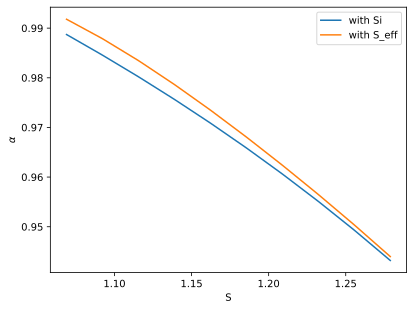

In [50]:
pyplot.plot(saturation, alpha_kinetic, label="with Si")
pyplot.plot(saturation, alpha_kinetic_eff, label="with S_eff")
pyplot.legend()
pyplot.gca().set(
    xlabel="S",
    ylabel="$\\alpha$",
)
show_plot('alpha_kinetic')

In [55]:
cp = 1885 * si.joule / si.kilogram / si.K
q_s = 1
drop_temperature = temperature - ls / cp * (1 - saturation) * D_light / K * q_s / A

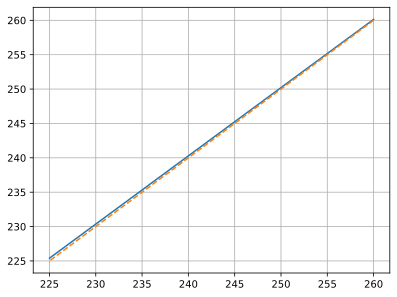

In [61]:
pyplot.plot(temperature, drop_temperature)
pyplot.plot(temperature, temperature, '--')
pyplot.grid()

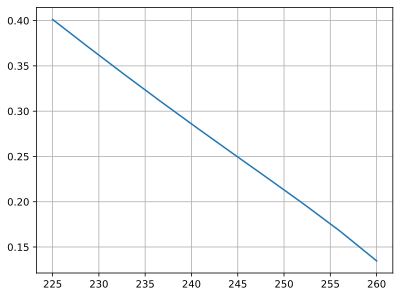

In [63]:
pyplot.plot(temperature, drop_temperature-temperature)
pyplot.grid()